In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import sys
import os
from plotly.offline import init_notebook_mode

In [2]:
df = pd.read_csv('../data/Customer-Value-Analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Our dataset has 9134 rows and 24 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Notice that the 'effective to date' column is in the wrong data type format which we will have to correct.

In [6]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

There are no null entries in our dataset.

In [8]:
# For ease, i prefer every column in the dataset to have lower case alphabets
df.rename(columns=lambda x: x.lower(), inplace=True)
df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Target column modification

Notice the response column which is our target column has entries 'No' and 'Yes'. We will encode this values to 0 (No) and 1 for (Yes) as in the snippet below;

In [11]:
df['outcome'] = df['response'].apply(lambda x: 0 if x=='No' else 1) 
df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,outcome
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


## Response Rate

Lets do some analysis on the new column created 'outcome' which tells us whether or not the marketing campaign recieved a positive outcome with respect to the customer.

In [13]:
response_rate = (df.groupby(by='response')['outcome'].count() / df.shape[0]).round(2)
response_rate

response
No     0.86
Yes    0.14
Name: outcome, dtype: float64

<b>Interpretation:</b> ~14% of customers responded positively while 86% of customers did not respond.

### Analysis on Sales channel with respect to customer response

In [16]:
resp_saleschannel = pd.pivot_table(df,
                                  values='response',
                                  index='sales channel',
                                  columns='outcome',
                                  aggfunc=len).fillna(0)
resp_saleschannel.columns = ['No response', 'responded']
resp_saleschannel

,No response,responded
sales channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


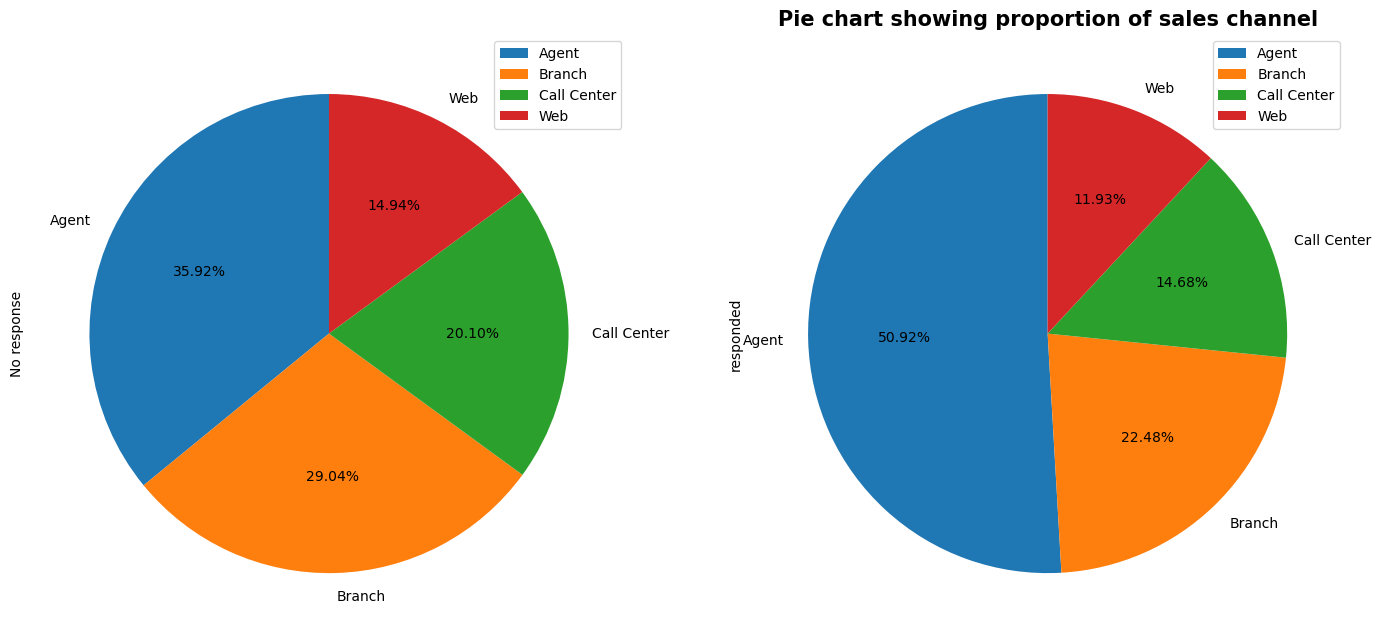

In [17]:
resp_saleschannel.plot(kind='pie',
                       figsize=(17, 8),
                       startangle=90,
                       autopct='%0.2f%%',
                       subplots=True
                      )
plt.title('Pie chart showing proportion of sales channel', fontsize=15, fontweight='bold')
plt.show()

<b>Interpretation:</b> We notice that more than half of the business' successful marketing came through marketing agents followed by branch sales channel.

One the other hand, the proportion appears to be fairly distributed among the sales channel.

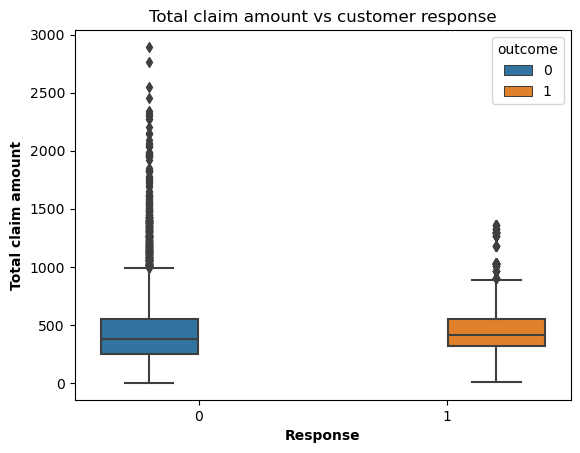

In [19]:
#ax, fig = figure(figsize(15,8))
sns.boxplot(data=df[['total claim amount', 'outcome']], x=df['outcome'], y=df['total claim amount'], hue=df.outcome)
plt.title('Total claim amount vs customer response')
plt.ylabel('Total claim amount', fontweight='bold')
plt.xlabel('Response', fontweight='bold')
plt.show()


<b>Interpretation:</b>
1. From the median value indicates a balanced in our data. As noticed from the boxplot, the median lies almost slightly at the midpoint of both the first quartile and third quartile.

2. Both responses appear to have equal median value.
3. We also notice that the data has more outliers in the 'No response' than with customer who responded positively to the marketing campaign.

## Applying Regression Analysis in the continuous or numerical features.

In [22]:
# First we separate the numerical features of our data from the dataset as in the code below.

In [23]:
num_data = df.select_dtypes(exclude='object')
num_data

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,outcome
0,2763.519279,56274,69,32,5,0,1,384.811147,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0
3,7645.861827,0,106,18,65,0,7,529.881344,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,0
9130,3096.511217,21604,79,14,28,0,1,379.200000,1
9131,8163.890428,0,85,9,37,3,2,790.784983,0
9132,7524.442436,21941,96,34,3,0,3,691.200000,0


In [24]:
input_var = num_data.drop('outcome', axis=1)
input_var

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [25]:
output_var = num_data.iloc[:,-1]
output_var

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: outcome, Length: 9134, dtype: int64

In [26]:
# import the statsmodel package.

import statsmodels.api as sm

# Next, we create an instance of the statsmodel using the logistic regression model.
logit = sm.Logit(output_var, input_var)

# Fit the model
logit_fit = logit.fit()

# Let's see a summary of what the statsmodel produced
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                -0.02546
Time:                        02:30:19   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
customer lifetime value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
monthly premium auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
months since last claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
months since policy inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
number of open complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
number of policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
total claim amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

<b>Interpretation:</b> <i>coef</i> represents the coefficients for each of the feature variables
<i>z or z-score</i> represents the number of standard deviations from the mean.
<i>P>|z| or p-value</i> tells us how likely it is to observe the relationship between the features or input and the output or target variable by chance.

Typically 0.05 is a good cut-off point. Which means, the lower the <i>p-value</i> the more likely it is that there is strong relationship between the feature variable and the output or target variable and it is not by chance.

Interpreting some of the statistical result above. We notice that <i>income, monthly premium auto, months since last claim, months since inception, number of complaints, number of policies</i> all have a strong relationship with respect to the target variable.

Take <i>income</i> for example, we see that it has a negative coefficient and a low <i>p-value</i> score suggesting that, the more income the customer earn, the less likely they are to responding positively to the marketing campaign.

So we are taking into consdieration, the <i>coefficient or coef</i> and the <i>p-value or P>|z|.</i>



## Encoding Categorical Variables

Categorical variables often do not have any natural order, or they are encoded with non-numerical values. When doing regression analysis, we need the input variables to have numerical values that signify the order or magnitudes of the variables.

In [29]:
gender_value, gender_labels = df['gender'].factorize()
gender_value

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
gender_labels

Index(['F', 'M'], dtype='object')

As we can notice from the above code snippet, 'F' is encoded as 0 and 'M' is encoded as 1.

One disadvantage of this method is that, it does not encode with natural ordering. That is, 1, 2, ...

For instance, Education has 5 categories which one could rank highest to lowest.

In [32]:
df['education'].value_counts()

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

In [33]:
# Encoding categorical variables to have natural order.
categories = pd.Categorical(df['education'],
                           categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'])
categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

In [34]:
categories.unique().codes

array([1, 2, 3, 0, 4], dtype=int8)

In [35]:
## Adding the encoded categorical columns to our original Dataframe
df['encoded_gender'] = gender_value
df['encoded_education'] = categories.codes
df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,outcome,encoded_gender,encoded_education
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0,1
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,1,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0,1,1
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1,0,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0,1,1
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0,1,2


In [36]:
## Applying the logistic regression of the statsmodel

logreg = sm.Logit(df['outcome'],
                 df[['encoded_gender', 'encoded_education']])
logreg_fit = logreg.fit()

# getting the statistical summary
logreg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                 -0.2005
Time:                        02:30:20   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
encoded_gender       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
encoded_education    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=====================================================================================
"""

<b>Interpretation:</b>

1. Notice That both coefficients have negative correlation with the target variable.
2. Their <i>p-value</i> is low, which suggests a significant relationship with the target variable.
3. We can deduce therefore, that male customers are less likely to respond to the marketing campaign as compared to females.
4. Customers with higher educational level are less likely to respond to the marketing campaign

## Combining continuous and categorical variables

In [39]:
X = pd.concat([input_var, df.encoded_gender, df.encoded_education], axis=1)
X

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,encoded_gender,encoded_education
0,2763.519279,56274,69,32,5,0,1,384.811147,0,1
1,6979.535903,0,94,13,42,0,8,1131.464935,0,1
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1
3,7645.861827,0,106,18,65,0,7,529.881344,1,1
4,2813.692575,43836,73,12,44,0,1,138.130879,1,1
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,1,1
9130,3096.511217,21604,79,14,28,0,1,379.200000,0,2
9131,8163.890428,0,85,9,37,3,2,790.784983,1,1
9132,7524.442436,21941,96,34,3,0,3,691.200000,1,2


In [40]:
logit = sm.Logit(output_var, X)

logit_fit = logit.fit()

# Get the statistical summary
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                -0.02454
Time:                        02:30:20   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
customer lifetime value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
monthly premium auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
months since last claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
months since policy inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
number of open complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
number of policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
total claim amount                0.0001      0.000      0.943      0.346      -0.000       0.000
encoded_gender                   -0.1500      0.058     -2.592      0.010      -0.263      -0.037
encoded_education                -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""